In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


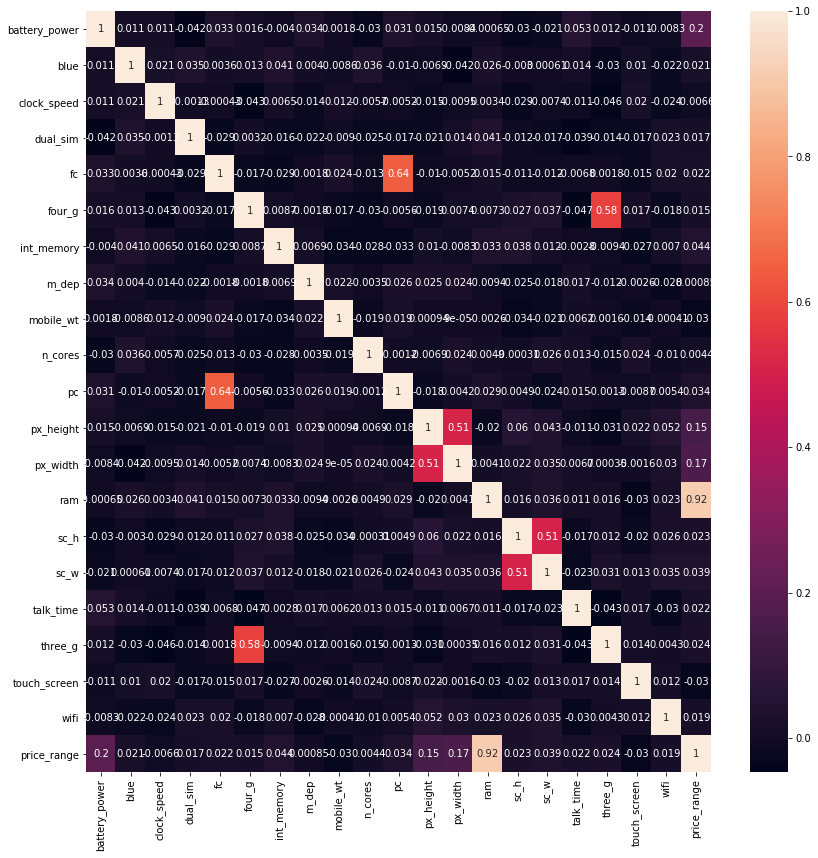

In [12]:
fig,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),ax=ax,annot=True)

In [7]:
X = df.drop(columns=['price_range'])
y = df['price_range']
X.shape,y.shape

((2000, 20), (2000,))

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [13]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
max_rs = -1
max_acc = -1
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=i)
    lr.fit(Xtrain,ytrain)
    pred = lr.predict(Xtest)
    r2 = r2_score(ytest, pred)
    print(r2)
    if(r2>max_acc):
        max_acc=r2
        max_rs=i
    

0.8207780987773083
0.7759522031366692
0.8132039072589605
0.8117535950277425
0.8174362431187506
0.7939752009534193
0.8055237837820021
0.8055497652596767
0.8170050468081828
0.8299019731371117
0.794973544973545
0.7944625036364327
0.8011099655045124
0.82045208275584
0.7756790952282586
0.8142058533377179
0.8381960804618531
0.8260819154178382
0.8110469005003077
0.7731151626798147
0.7891441275796107
0.7922554084956437
0.8366952341137124
0.8308028246351087
0.8074077402829181
0.774122268598085
0.781396517352875
0.808157284565592
0.7914358784994324
0.7865289942888296
0.8120674444900039
0.8231154032348158
0.8286861816370622
0.8347578520339944
0.8039461462561749
0.8192054555546745
0.8271867279407059
0.8054570933970819
0.7980235869040464
0.843642695967821
0.8098579846863776
0.8269681970721113
0.8258838321581776
0.8093887838689351
0.8066340374812975
0.7579407452678274
0.8476012116489235
0.7867087216742719
0.7618063022082541
0.8195238741766812
0.8002133206157297
0.7768587664752611
0.8192933450945801


0.785536443725098
0.8029969877603935
0.7901324073720761
0.8113061634831026
0.8135390619017018
0.8060881846299032
0.8088171628466967
0.7979951013812084
0.7773048156242941
0.8518744613616777
0.8076012313521194
0.7754863648639415
0.7861182586434347
0.8209027814290972
0.8238811090283138
0.8406311637080868
0.8335920173935222
0.8090671207321807
0.7688419320735218
0.7712090848363393
0.7937374769182415
0.8452989443199961
0.7837111931071663
0.8293324826541192
0.7966211160066944
0.8164389784051347
0.7892866868086983
0.8138543699291363
0.8177126263330754
0.8158758691283127
0.794083430780469
0.7961051412633388
0.853518574448807
0.8119647768595568
0.8282382554003453
0.8506087692652441
0.8259918464750919
0.8151074589127687
0.8173436817941184
0.7989871445266848
0.8249299719887955
0.7972452386423541
0.8196312102423706
0.7977653066383539
0.7790030653387772
0.8060631135274211
0.8022587881381207
0.765650606358571
0.8067829025792845
0.8201983496101143
0.8168345683123803
0.7722095671981777
0.80565511748307

0.83424828281221
0.745361704423961
0.8046149312628922
0.8131392913111342
0.8203034803876356
0.8181818181818181
0.8267417140395403
0.8308680573800641
0.8130304857016676
0.8405244164712458
0.8009573466157894
0.8122529644268774
0.7938217395646416
0.8202377316228874
0.8121777674823369
0.8294885259358514
0.7808395777938925
0.783083771752327
0.8483796331393604
0.7933016721406461
0.7969989117810516
0.8067607956302174
0.8178912433946328
0.8415021863374884
0.8185356954739912
0.8423628713056724
0.8337723448328772
0.8478600566087373
0.8078522289141445
0.8145794439918985
0.8069781390778341
0.8386695306666175
0.782444447442626
0.7860176412936949
0.8230642118932445
0.7703381249151817
0.801568886001325
0.8292235256563723
0.8308268299161408
0.783348614059105
0.8001116836307333
0.78805243739697
0.8043961566230189
0.8069825718573934
0.7944826495929176
0.7909502526422916
0.8330609873158454
0.8416565164433617
0.8045874331656179
0.7748517637159649
0.8021474849176713
0.7875476358035347
0.8356802368708509
0.

In [14]:
max_acc,max_rs

(0.8701733939995955, 944)